<a href="https://colab.research.google.com/github/Sirius724/Computational-Physics/blob/main/%EC%A0%84%EC%82%B0%EB%AC%BC%EB%A6%AC%ED%95%99_7_2%EC%B0%A8%EC%9B%90_2%EA%B3%84_%EB%AF%B8%EB%B6%84%EB%B0%A9%EC%A0%95%EC%8B%9D%EC%9D%98_%ED%92%80%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/전산 물리학"
data = "/content/drive/MyDrive/Colab Notebooks/전산 물리학/data"
import os
import numpy as np ; import math as mt
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

if not os.path.isdir(data): 
    os.makedirs(data)


Mounted at /content/drive


# 러더퍼드 산란 실험 시뮬레이션

In [70]:
# Use Euler method

AMU = 1.66e-27 # Atomic mass unit
CHARGE_unit = 1.6e-19  # charge unit
Q_alpha = 2.*CHARGE_unit # alpha particle charge
Q_target = 79.0*CHARGE_unit # target particle charge
M_alpha = 4.0*AMU # alpha mass
M_target = 197.0*AMU # target mass
CK = 8.99e+9 # 쿨롱 상수
dT = 1.0e-23 # time interval
MAX_time = 4e-20
V0 = 1.0e+7 # 알파입자의 초속도

def distance(a,b,c,d):
    dis = np.sqrt((a-c)**2+(b-d)**2)
    return dis

def acc(e,f,g,h):
    ac = e*(f-g)/h**3
    return ac

class main():
    def simulation(self):
        save = open(f"{data}/rutherford.txt","w+")
        output_step = 0
        cc = CK*Q_target*Q_alpha/(M_alpha) # 쿨롱 상수와 모든 전하량의 곱
        rt = mt.pow(197, 0.33333)*1.0e-15  # 
        bb = rt/2.0
        Y0 = np.arange(0,bb*20,2*bb)
        ## 다양한 초기 ya 값 (impact parameter) 으로 궤적을 그려본다
        for y in Y0:
            xa = -2e-13
            ya = y
            vax = V0 # x방향 초속도
            vay = 0  # y방향 초속도
            xt = yt = vtx = vty = 0 # 표적의 속도는 정지상태
            rr = distance(xa,ya,xt,yt) # 알파 입자와 과녁핵의 중심 간의 거리 계산
            ax = acc(cc,xa,xt,rr) # 알파 입자의 가속도 중 x 성분
            ay = acc(cc,ya,yt,rr) # 알파 입자의 가속도 중 y 성분
            atx = -ax*M_alpha/M_target # 과녁핵의 가속도 중 x 성분
            aty = -ay*M_alpha/M_target # 과녁핵의 가속도 중 y 성분

            time = np.arange(0,MAX_time,dT)
            for t in time : # Euler 방법으로 계산
                xa = xa + dT*vax 
                ya = ya + dT*vay
                
                if output_step % 30 == 0 :
                    save.write(f"{xa}\t{ya}\n")
                
                xt = xt + dT*vtx
                yt = yt + dT*vty
                rr = distance(xa,ya,xt,yt)

                if rr>rt: # 알파 입자가 타겟 입자 밖에 있는 경우
                    ax = acc(cc,xa,xt,rr)
                    ay = acc(cc,ya,yt,rr)
                else : # 알파 입자가 타겟 입자 안에 있는 경우
                    ax = acc(cc,xa,xt,rt)
                    ay = acc(cc,ya,yt,rt)
                
                atx = -ax*M_alpha/M_target
                aty = -ay*M_alpha/M_target
                vax = vax + dT*ax
                vay = vay + dT*ay
                vtx = vtx + dT*atx
                vty = vty + dT*aty
                
                output_step +=1

        save.close()

ru = main()

ru.simulation()



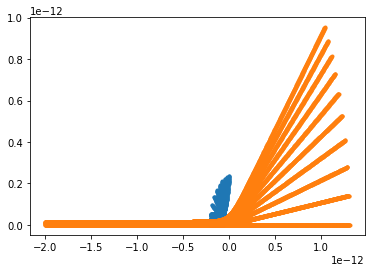

In [73]:
position = pd.read_csv(f"{data}/rutherford.txt", sep='\t',header=None,engine="python")
position1 = pd.read_csv(f"{data}/rutherford_30AU.txt", sep='\t',header=None,engine="python")
plt.plot(position[0],position[1],".")
plt.plot(position1[0],position1[1],".")

## 30배 크기의 금 원자 궤도

In [69]:
AMU = 1.66e-27 # Atomic mass unit
CHARGE_unit = 1.6e-19  # charge unit
Q_alpha = 2.*CHARGE_unit # alpha particle charge
Q_target = 79.0*CHARGE_unit # target particle charge
M_alpha = 4.0*AMU # alpha mass
M_target = 197.0*AMU # target mass
CK = 8.99e+9 # 쿨롱 상수
dT = 1.0e-23 # time interval
MAX_time = 4.0e-19
V0 = 1.0e+7 # 알파입자의 초속도

def distance(a,b,c,d):
    dis = np.sqrt((a-c)**2+(b-d)**2)
    return dis

def acc(e,f,g,h):
    ac = e*(f-g)/h**3
    return ac


class main():
    def simulation(self):
        save = open(f"{data}/rutherford_30AU.txt","w+")
        output_step = 0
        cc = CK*Q_target*Q_alpha/(M_alpha) # 쿨롱 상수와 모든 전하량의 곱
        rt = 30*mt.pow(197, 0.33333)*1.0e-15  # 
        bb = rt/2.0/100
        Y0 = np.arange(0,bb*20,2*bb)
        ## 다양한 초기 ya 값 (impact parameter) 으로 궤적을 그려본다
        for y in Y0:
            xa = -2e-12
            ya = y
            vax = V0 # x방향 초속도
            vay = 0  # y방향 초속도
            xt = yt = vtx = vty = 0 # 표적의 속도는 정지상태
            rr = distance(xa,ya,xt,yt) # 알파 입자와 과녁핵의 중심 간의 거리 계산
            ax = acc(cc,xa,xt,rr) # 알파 입자의 가속도 중 x 성분
            ay = acc(cc,ya,yt,rr) # 알파 입자의 가속도 중 y 성분
            atx = -ax*M_alpha/M_target # 과녁핵의 가속도 중 x 성분
            aty = -ay*M_alpha/M_target # 과녁핵의 가속도 중 y 성분

            time = np.arange(0,MAX_time,dT)
            for t in time : # Euler 방법으로 계산
                xa = xa + dT*vax 
                ya = ya + dT*vay
                
                if output_step % 30 == 0 :
                    save.write(f"{xa}\t{ya}\n")
                
                xt = xt + dT*vtx
                yt = yt + dT*vty
                rr = distance(xa,ya,xt,yt)

                if rr>rt: # 알파 입자가 타겟 입자 밖에 있는 경우
                    ax = acc(cc,xa,xt,rr)
                    ay = acc(cc,ya,yt,rr)
                else : # 알파 입자가 타겟 입자 안에 있는 경우
                    ax = acc(cc,xa,xt,rt)
                    ay = acc(cc,ya,yt,rt)
                
                atx = -ax*M_alpha/M_target
                aty = -ay*M_alpha/M_target
                vax = vax + dT*ax
                vay = vay + dT*ay
                vtx = vtx + dT*atx
                vty = vty + dT*aty
                
                output_step +=1

        save.close()

ru = main()

ru.simulation()

